# **8. 고급 인공신경망의 구현**
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 머신러닝 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML2nd
*  저작권 : 본 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### **LAB 8-1 Fashion-MNIST 데이터 분류하기**

In [1]:
# tensorflow와 tf.keras를 임포트한다
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 패션 MNIST 데이터는 keras에서 제공함. 이를 학습용, 테스트 데이터로 구분.
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(train_images.shape)  # 학습 이미지의 형태와 레이블을 출력한다
print(train_labels)
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


In [4]:
print(train_images.shape)  # 학습 이미지의 형태와 레이블을 출력한다
print(train_labels)
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


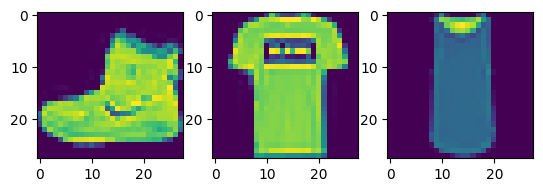

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.imshow(train_images[0])       # 첫 번째 훈련용 데이터
ax2.imshow(train_images[1])       # 두 번째 훈련용 데이터
ax3.imshow(train_images[2])       # 세 번째 훈련용 데이터
plt.show()

In [6]:
print(train_labels[:3])

[9 0 0]


In [7]:
# 0-255 구간의 픽셀값을 실수로 정규화한다
train_images, test_images = train_images / 255, test_images / 255
model = keras.models.Sequential( [
   keras.layers.Flatten(input_shape=(28, 28)),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(128, activation= 'relu'),
   keras.layers.Dense(32, activation= 'relu'),
   keras.layers.Dense(10, activation= 'softmax'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=64,
                    epochs=10, validation_split=0.25)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7149 - loss: 0.8429 - val_accuracy: 0.8301 - val_loss: 0.4809
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8356 - loss: 0.4584 - val_accuracy: 0.8524 - val_loss: 0.4121
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8500 - loss: 0.4190 - val_accuracy: 0.8573 - val_loss: 0.3863
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8605 - loss: 0.3825 - val_accuracy: 0.8610 - val_loss: 0.3807
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8653 - loss: 0.3654 - val_accuracy: 0.8703 - val_loss: 0.3547
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8701 - loss: 0.3478 - val_accuracy: 0.8785 - val_loss: 0.3377
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8779 - loss: 0.3335 - val_accuracy: 0.8749 - val_loss: 0.3401
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8739 - loss: 0.3355 - val_accuracy: 0.

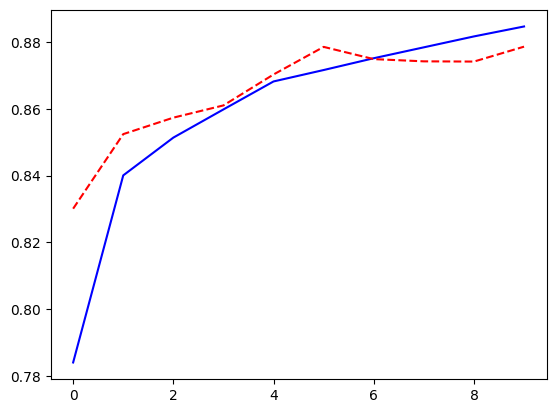

In [9]:
plt.plot(history.history['accuracy'], 'b-')
plt.plot(history.history['val_accuracy'], 'r--')

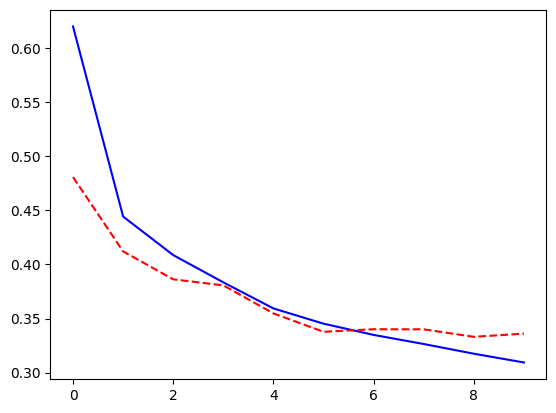

In [11]:
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8724 - loss: 0.3574
테스트 정확도: 0.8723999857902527


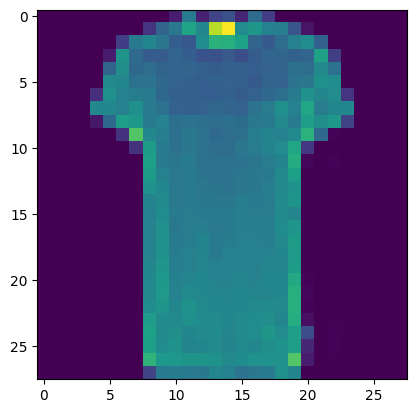

In [13]:
randIdx = np.random.randint(0, 1000)
plt.imshow(test_images[randIdx])

In [14]:
print(test_images[randIdx].shape)
new_image = test_images[randIdx][np.newaxis, :, :]
print(new_image.shape)

yhat = model.predict(new_image)
print(yhat.round(3))    # 소수점 아래 세 자리 정확도로 살펴보자

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[0.974 0.    0.005 0.003 0.    0.    0.018 0.    0.    0.   ]]


In [15]:
yhat = np.argmax( model.predict( test_images[randIdx][np.newaxis, :, :]) )
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


np.int64(0)

In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [17]:
print(class_names[yhat])

T-shirt/top


In [18]:
def plot_images(images, labels, images_per_row=5):
  n_images = len(images)
  n_rows = (n_images-1) // images_per_row + 1
  fig, ax = plt.subplots(n_rows, images_per_row,
                         figsize = (images_per_row * 2, n_rows * 2))
  for i in range(n_rows):
      for j in range(images_per_row):
          if i*images_per_row + j >= n_images: break
          img_idx = i*images_per_row + j
          a_image = images[img_idx].reshape(28,28)
          if n_rows>1: axis = ax[i, j]
          else: axis = ax[j]
          axis.get_xaxis().set_visible(False)
          axis.get_yaxis().set_visible(False)
          label = class_names[labels[img_idx]]
          axis.set_title(label)
          axis.imshow(a_image, interpolation='nearest')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 2 8 0 2 7 7 9 1]


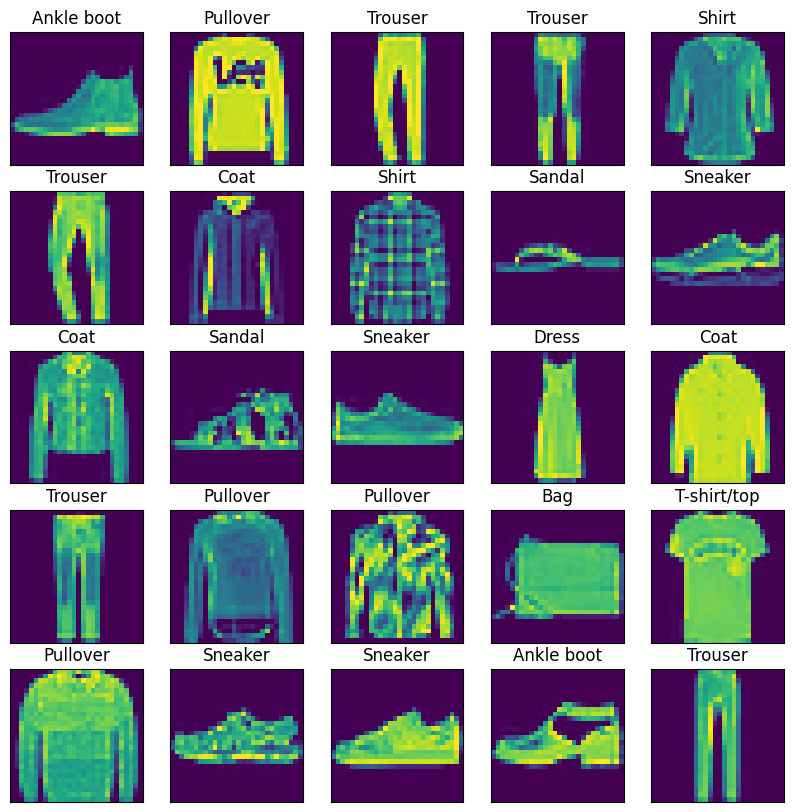

In [19]:
images = test_images[:25]
predictions = np.argmax(model.predict(images), axis=1)
print(predictions)
plot_images(images, predictions, images_per_row = 5)